In [1]:
import sys, os
sys.path.append("dl_tsc")
from dl_tsc.classifiers.fcn import Classifier_FCN
from preprocessing import ConstantLengthDataGenerator
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data_path = './data'
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}/y.npy")

In [3]:
y_encoder = sklearn.preprocessing.OneHotEncoder(categories='auto')
y = y_encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [4]:
number_of_classes = y.shape[1]
initial_learning_rate=1e-4
output_directory=f'{data_path}/models/fcn/outputs'
os.makedirs(output_directory, exist_ok=True)

In [5]:
input_layer = keras.layers.Input((None, 1))

conv1 = keras.layers.Conv1D(filters=128, kernel_size=11, padding="same")(
    input_layer
)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.Activation(activation="relu")(conv1)

conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding="same")(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.Activation("relu")(conv2)

conv3 = keras.layers.Conv1D(128, kernel_size=3, padding="same")(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.Activation("relu")(conv3)

gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)

output_layer = keras.layers.Dense(number_of_classes, activation="softmax")(gap_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate, decay_steps=3, decay_rate=1
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr_schedule),
    metrics=["accuracy"],
)

2022-12-04 21:52:42.839556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 21:52:42.852001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 21:52:42.853770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 21:52:42.856287: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [7]:
kwargs = {"min_length": 256, "max_length": 256}
data_generator_train = ConstantLengthDataGenerator(X_train, y_train, batch_size=1024, **kwargs)
data_generator_val = ConstantLengthDataGenerator(X_val, y_val, batch_size=len(y_val),  **kwargs)

In [8]:
history = model.fit(data_generator_train, epochs=30, validation_data=next(data_generator_val))

Epoch 1/30


2022-12-04 21:53:18.660363: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


440/440 [==============================] - 123s 270ms/step - loss: 6.6072 - accuracy: 0.0139 - val_loss: 6.5995 - val_accuracy: 0.0111
Epoch 2/30
440/440 [==============================] - 117s 267ms/step - loss: 5.8137 - accuracy: 0.0519 - val_loss: 5.7110 - val_accuracy: 0.0591
Epoch 3/30
440/440 [==============================] - 118s 268ms/step - loss: 5.2117 - accuracy: 0.1137 - val_loss: 5.2411 - val_accuracy: 0.1070
Epoch 4/30
440/440 [==============================] - 118s 268ms/step - loss: 4.7720 - accuracy: 0.1760 - val_loss: 5.7655 - val_accuracy: 0.0485
Epoch 5/30
440/440 [==============================] - 118s 268ms/step - loss: 4.4065 - accuracy: 0.2293 - val_loss: 4.6223 - val_accuracy: 0.1658
Epoch 6/30
440/440 [==============================] - 118s 268ms/step - loss: 4.0865 - accuracy: 0.2738 - val_loss: 5.8360 - val_accuracy: 0.0756
Epoch 7/30
440/440 [==============================] - 118s 268ms/step - loss: 3.8105 - accuracy: 0.3101 - val_loss: 4.1820 - val_accura

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


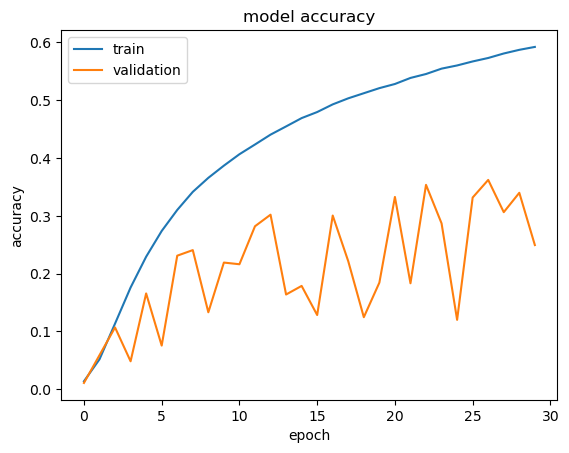

In [9]:
figure = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
figure

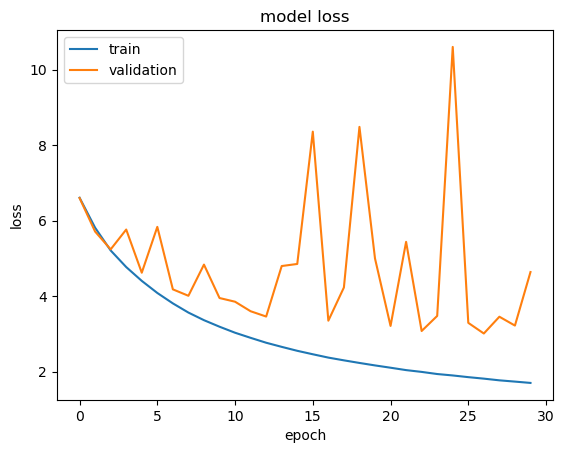

In [10]:
figure = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
figure 

In [12]:
model.evaluate(data_generator_val)

10/10 [==============================] - 25s 2s/step - loss: 4.6230 - accuracy: 0.2446


[4.623015403747559, 0.24456040561199188]